##Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

##Importing Youtube Videos Dataset

In [ ]:
data = pd.read_csv('/content/Youtube_Video_Dataset - Youtube_Video_Dataset.csv', encoding = 'utf-8')
display(data.shape)

(11211, 4)

In [ ]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
display(data.shape)

(11211, 4)

In [ ]:
data.head()

,Title,Videourl,Category,Description
0,Weekend in North Goa 🌊 GOA TRAVEL VLOG | Kriti...,/watch?v=0W0KL44OJbY,travel blog,OYO Home invited me to spend a weekend in Goa ...
1,Jathar Textile Pvt Ltd Ichalkaranji,/watch?v=E2A-Dz4Ywxg,manufacturing,Jathar Textile Pvt. Ltd.is originated in the y...
2,"Paddleboarding on the North Shore of Oahu, Hawaii",/watch?v=BlaOCzzqZb4,Food,Go to http://migrationology.com/ for more trav...
3,Common - The Food,/watch?v=Mco3xpXfnsU,Food,Awesome Artist!
4,Wayanad Pooppoli 2018 - വയനാട് പൂപ്പൊലി 2018,/watch?v=REm2u9HeO-o,travel blog,വയനാട് പൂപ്പൊലി 2018 ന്റെ അവസാന ദിവസം സന്ദർശിക...


In [ ]:
temp_data = data

In [ ]:
first = data.iloc[0]
print(first)

Title          Weekend in North Goa 🌊 GOA TRAVEL VLOG | Kriti...
Videourl                                    /watch?v=0W0KL44OJbY
Category                                             travel blog
Description    OYO Home invited me to spend a weekend in Goa ...
Name: 0, dtype: object


##Data Analysis for the Feature = 'Category'

In [ ]:
data["Title"].value_counts()

SMT solutions for Electronic Manufacturing LED PCB assembly                                             8
Home Textile Manufacturers in India                                                                     4
TRYING FOOD FROM AROUND THE WORLD!                                                                      4
LOTTERY MACHINE FROM GUANGZHOU QIQI ELECTRONIC MANUFACTURING CO.,LTD                                    4
Science Technology and Society                                                                          3
                                                                                                       ..
"Notice" by Art and Music                                                                               1
Decoding the Secret Signals of Glow-in-the-Dark Sea Creatures                                           1
I'M THE QUEEN OF THE DESERT - Dubai travel diary pt 2                                                   1
Frank Clarke Simply Painting Introduction to W

In [ ]:
data["Category"].value_counts()/data.shape[0]

travel blog           0.196236
Science&Technology    0.184997
Food                  0.163054
Art&Music             0.157435
manufacturing         0.151548
History               0.146731
Name: Category, dtype: float64

In [ ]:
fig = go.Figure([go.Bar(x=data['Category'].value_counts().index, y=data['Category'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Category",
    xaxis_title="Video Category",
    yaxis_title="Values")
fig.show()

##Text Preprocessing

In [ ]:
data = data[["Title","Category"]]
data = data[:11211]
data.shape

(11211, 2)

In [ ]:
data.head()

,Title,Category
0,Weekend in North Goa 🌊 GOA TRAVEL VLOG | Kriti...,travel blog
1,Jathar Textile Pvt Ltd Ichalkaranji,manufacturing
2,"Paddleboarding on the North Shore of Oahu, Hawaii",Food
3,Common - The Food,Food
4,Wayanad Pooppoli 2018 - വയനാട് പൂപ്പൊലി 2018,travel blog


##Text Cleaning

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

import nltk
nltk.download('wordnet')

stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
clean(data['Title'][0])

'weekend north goa 🌊 goa travel vlog kritika goel'

In [ ]:
data['Title'] = data['Title'].apply(clean)
data.head()

,Title,Category
0,weekend north goa 🌊 goa travel vlog kritika goel,travel blog
1,jathar textile pvt ichalkaranji,manufacturing
2,paddleboarding north shore,Food
3,common food,Food
4,വയനാട് പൂപ്പൊലി,travel blog


##TF-IDF Vectorizer

In [ ]:
docs = list(data['Title'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
X = docs
y = data['Category']
print(X.shape, y.shape)

(11211, 13740) (11211,)


In [ ]:
fig = go.Figure([go.Bar(x=y.value_counts().index, y=y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Category",
    xaxis_title="Video Category",
    yaxis_title="Values")
fig.show()

In [ ]:
data.head()

,Title,Category
0,weekend north goa 🌊 goa travel vlog kritika goel,travel blog
1,jathar textile pvt ichalkaranji,manufacturing
2,paddleboarding north shore,Food
3,common food,Food
4,വയനാട് പൂപ്പൊലി,travel blog


##Train-Test Split

In [ ]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8968, 13740) (8968,)
(2243, 13740) (2243,)


In [ ]:
data["Title"]

0         weekend north goa 🌊 goa travel vlog kritika goel
1                          jathar textile pvt ichalkaranji
2                               paddleboarding north shore
3                                              common food
4                                          വയനാട് പൂപ്പൊലി
                               ...                        
11206    രുചിയുടെ കലവറ തേടി oryx village kanhangad expl...
11207                                   youtube travellers
11208    hanging korean cafe travel blogging cafe jeste...
11209                 northeastern chinese dishes need try
11210    taj rambagh palace jaipur luxurious suites tra...
Name: Title, Length: 11211, dtype: object

##Naive Bayes Classifier

###Gausian Naive Bayes

In [ ]:
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 1.88 s, sys: 785 ms, total: 2.66 s
Wall time: 3.03 s

Training Accuracy score: 0.9402319357716324
Testing Accuracy score: 0.6963887650468124


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology']))

                    precision    recall  f1-score   support

              Food       0.73      0.63      0.68       353
     manufacturing       0.70      0.78      0.74       366
           History       0.59      0.76      0.67       329
       travel blog       0.66      0.54      0.60       415
         Art&Music       0.68      0.81      0.74       340
Science&Technology       0.83      0.69      0.75       440

          accuracy                           0.70      2243
         macro avg       0.70      0.70      0.70      2243
      weighted avg       0.71      0.70      0.70      2243



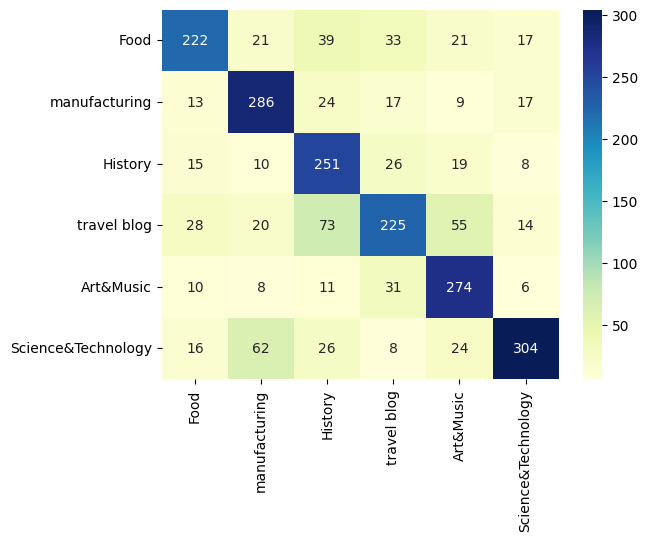

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'],
                                  index=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

##Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB()
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 931 ms, sys: 166 ms, total: 1.1 s
Wall time: 882 ms

Training Accuracy score: 0.9737957181088314
Testing Accuracy score: 0.9215336602764155


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology']))

                    precision    recall  f1-score   support

              Food       0.96      0.96      0.96       353
     manufacturing       0.96      0.88      0.92       366
           History       0.94      0.89      0.91       329
       travel blog       0.87      0.88      0.87       415
         Art&Music       0.95      0.94      0.95       340
Science&Technology       0.89      0.96      0.92       440

          accuracy                           0.92      2243
         macro avg       0.93      0.92      0.92      2243
      weighted avg       0.92      0.92      0.92      2243



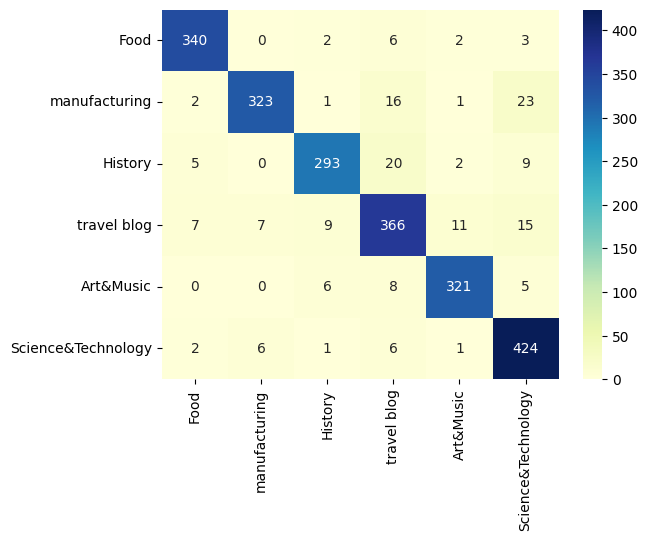

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'],
                                  index=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

##Logistic Regression Classifier

In [ ]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 2min 40s, sys: 21.5 s, total: 3min 2s
Wall time: 2min

Training Accuracy score: 0.975914362176628
Testing Accuracy score: 0.9268836379848417


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology']))

                    precision    recall  f1-score   support

              Food       0.99      0.95      0.97       353
     manufacturing       0.97      0.91      0.94       366
           History       0.98      0.89      0.93       329
       travel blog       0.78      0.96      0.86       415
         Art&Music       1.00      0.91      0.96       340
Science&Technology       0.94      0.92      0.93       440

          accuracy                           0.93      2243
         macro avg       0.94      0.93      0.93      2243
      weighted avg       0.94      0.93      0.93      2243



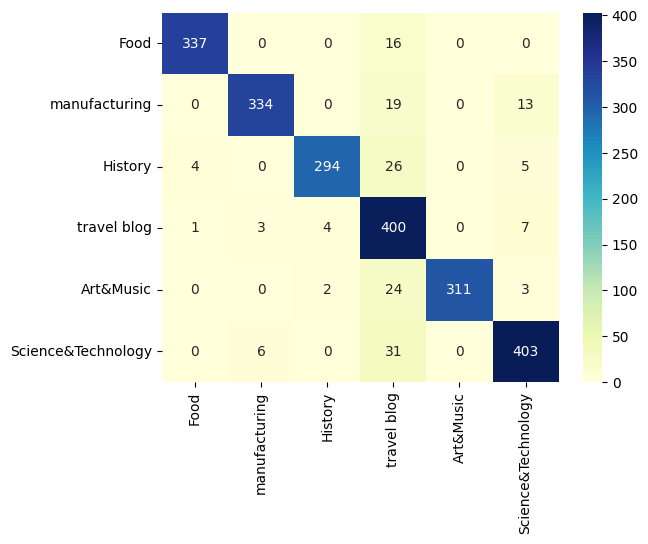

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'],
                                  index=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

##Support Vector Machines

In [ ]:
svc =  LinearSVC(class_weight='balanced')
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 1.05 s, sys: 1.91 ms, total: 1.05 s
Wall time: 1.08 s

Training Accuracy score: 0.9950936663693131
Testing Accuracy score: 0.9398127507802051


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology']))

                    precision    recall  f1-score   support

              Food       0.99      0.97      0.98       353
     manufacturing       0.95      0.93      0.94       366
           History       0.97      0.93      0.95       329
       travel blog       0.85      0.94      0.89       415
         Art&Music       0.98      0.94      0.96       340
Science&Technology       0.94      0.93      0.94       440

          accuracy                           0.94      2243
         macro avg       0.95      0.94      0.94      2243
      weighted avg       0.94      0.94      0.94      2243



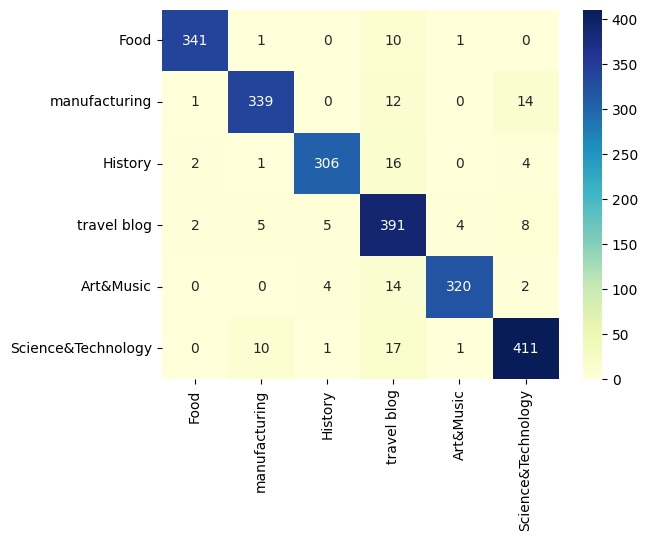

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'],
                        index=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 32.7 s, sys: 149 ms, total: 32.9 s
Wall time: 33.4 s

Training Accuracy score: 0.9976583407671722
Testing Accuracy score: 0.8805171645118145


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology']))

                    precision    recall  f1-score   support

              Food       0.97      0.96      0.97       353
     manufacturing       0.92      0.85      0.89       366
           History       0.94      0.90      0.92       329
       travel blog       0.87      0.75      0.80       415
         Art&Music       0.98      0.91      0.94       340
Science&Technology       0.73      0.93      0.81       440

          accuracy                           0.88      2243
         macro avg       0.90      0.88      0.89      2243
      weighted avg       0.89      0.88      0.88      2243



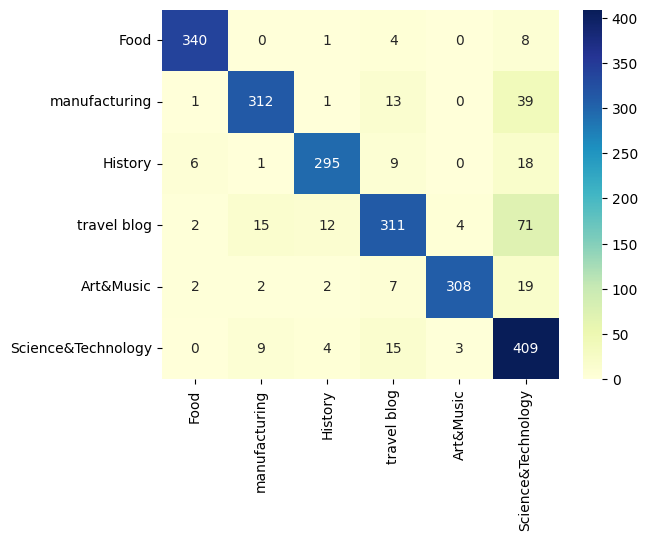

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'],
                        index=['Food', 'manufacturing','History','travel blog','Art&Music','Science&Technology'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

##Ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('LinearSVC', svc),
               ('Logistic Regression', lr),
                ('MultinomialNB', mnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9848349687778769
Testing Accuracy score: 0.942041908158716


In [ ]:
#predictions = pd.Series(vc.predict(X), name="Category")
#results = pd.concat([predictions],axis=1)
#results.to_csv("/Youtube_Video_Dataset - Youtube_Video_Dataset.csv",index=False)

In [ ]:
data

,Title,Category
0,weekend north goa 🌊 goa travel vlog kritika goel,travel blog
1,jathar textile pvt ichalkaranji,manufacturing
2,paddleboarding north shore,Food
3,common food,Food
4,വയനാട് പൂപ്പൊലി,travel blog
...,...,...
11206,രുചിയുടെ കലവറ തേടി oryx village kanhangad expl...,travel blog
11207,youtube travellers,travel blog
11208,hanging korean cafe travel blogging cafe jeste...,travel blog
11209,northeastern chinese dishes need try,Food


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the target sentence and a list of sentences
target_sentence = "receipe of vegetarian food"
sentences = list(data['Title'])
# tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
# tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
# docs = tfidf_vectorizer_vectors.toarray()
# Create a TF-IDF vectorizer and fit it to the sentences
def func(target_sentence):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(sentences)

    # Transform the target sentence and sentences to vectors
    target_vector = vectorizer.transform([target_sentence])
    sentence_vectors = vectorizer.transform(sentences)

    # Calculate the cosine similarity between the target sentence and sentences
    cosine_similarities = cosine_similarity(target_vector, sentence_vectors)

    # Get the indices of the top 10 most similar sentences
    top10_indices = cosine_similarities.argsort()[0][-10:][::-1]

    # Print the top 10 most similar sentences
    print("Top 10 most similar sentences:")
    idx = []
    z = 0
    for i in top10_indices:
        idx.append(sentences.index(sentences[i]))
        print(f"{sentences[i]} (cosine similarity: {cosine_similarities[0][i]}) {temp_data.iloc[idx[z]]['Videourl']}")
        z = z+1
    return

In [ ]:
keyword = input()

goa travel


In [ ]:
idx = func("receipe of vegetarian food")

Top 10 most similar sentences:
vegetarian thai food discussion easy vegetarian (cosine similarity: 0.7778491863410802) /watch?v=jRaQorexCoQ
world went vegetarian (cosine similarity: 0.5872146321904691) /watch?v=ANUoAdXfA60
vegetarian thai food mbk food court (cosine similarity: 0.5606374707839095) /watch?v=xVF5XYWrZ34
eating vegetarian final questions (cosine similarity: 0.4966609186977447) /watch?v=EXfUOgM2nvs
huuuge indian street food adventure best vegetarian street food spicy (cosine similarity: 0.48617688569185047) /watch?v=c9B63TchVXQ
vegetarian thai food guide eating healthy delicious thai food (cosine similarity: 0.47410389176858025) /watch?v=WgZstdvtUXU
kolkata street food amazing indian vegetarian meal s lane (cosine similarity: 0.45411138625987985) /watch?v=24Yci74WGfo
thailand vegetarian food festival bangkok เทศกาลกินเจ (cosine similarity: 0.42830332592277154) /watch?v=KYTRqA_-m94
thailand vegetarian food festival bangkok เทศกาลกินเจ (cosine similarity: 0.42830332592277154

In [ ]:
idx_1 = func(keyword)

Top 10 most similar sentences:
goa (cosine similarity: 0.8363991584599317) /watch?v=NWWGpi_jQ2M
goa (cosine similarity: 0.8363991584599317) /watch?v=NWWGpi_jQ2M
goa travel vlog (cosine similarity: 0.8282586881782399) /watch?v=V-Hu5BiEg4U
goa travel vlog (cosine similarity: 0.8282586881782399) /watch?v=V-Hu5BiEg4U
goa travel vlog (cosine similarity: 0.8282586881782399) /watch?v=V-Hu5BiEg4U
goa travel vlog (cosine similarity: 0.8282586881782399) /watch?v=V-Hu5BiEg4U
goa travel blog (cosine similarity: 0.8205791138784744) /watch?v=AY7nVgz45Rc
goa vlog goa travel vlog (cosine similarity: 0.76548463208249) /watch?v=wYIaC7j_4Vw
goa travel video goa best places (cosine similarity: 0.7555613150612179) /watch?v=afPQbp0FqCQ
goa travel vlog days south goa (cosine similarity: 0.7277913885345668) /watch?v=EdcZ25BK5vA
